<h3>Top 500 Albums of All Time

The purpose of this analysis will be see which genres and artists ruled the top
    500 albums of all time according to <b>albumoftheyear.org</b>.</h3>

<h3>Questions:</h3>
<br><b>1. Top 10 Album Genres</b> - Which albums, frequently occuring and not 'Unknown' appeared most often? 
<br>
<br><b>2. Most occurring decade in dataset</b> - Which was the "BEST" decade for music according to this data?
<br>
<br> <b>3. Patterns in between Genre and Dates</b> - what genres were most prevalent in each year? 
<br>
<br> <b>4. Most loved artists </b> - Which artists appeared on this list the most? 
<br>

In [1373]:
# libraries to be used
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [942]:
ad = pd.read_csv('album_download.csv')
ad2 = ad.copy()

<h3>Data Cleaning & Exploration</h3>
<br><b> Artist Name and Album Name: </b>Upon exploring the data it is clear to see that the name of the album and the artist are joined by a -. These two should be split into two separate columns. 

<br>
<br><b> Date: </b>The data column can be converted into a datetime object and used as a vehicle to index our data based on time values. 
<br> First attempt at changing to a DateTime objected yielded this error: <i>"day is out of range for month: November 0, 1974"</i>.
    <br>
<br> Second attempt yielded multiple values with zero as the date. These were found and changed to the corresponding date by Google search. 
<br>
<br><b> Score: </b>The score column and the rank column are directly correlated but the score column is not as relevant. It should be dropped. 

In [943]:
# splitting the arist and album name into two separate columns 
ad2['artist_name'] = ad2['name'].apply(lambda x: x.split('-')[0])
ad2['album_name'] = ad2['name'].apply(lambda x: x.split('-')[1])

# drop the original name column and this added unnamed column
ad2.drop(columns=['name', 'Unnamed: 0'], inplace=True)

# ad2['date'][50:100].str.contains(r"\b0\b")


In [944]:
# find ad2['date'] == 'November 0, 1974' and update to 'November 1, 1974'
ad.iloc[92, 1] = 'November 1, 1974'
ad2.iloc[92, 1] = 'November 1, 1974'

# find all 0s
zero_finder = ad2['date'][ad2['date'].notna()].str.contains(r"\b0\b")
zero_finder[zero_finder == True]
date_errors = ad2.iloc[[159, 232, 250, 253, 254, 278, 387, 446]]


    During this exercise below all dates which were to cause an error due to 0 being set 
    for the date were cleaned and replaced with their actual date from Google. If no date 
    appeared on Google a value of 1 was placed as the placeholder. 

In [945]:
# find all days with zero as the value and update with the appropriate information
# updating both copy and original dataframes
zero_finder = ad2['date'][ad2['date'].notna()].str.contains(r"\b0\b")
zero_finder[zero_finder == True]
ad2.iloc[[159, 232, 250, 253, 254, 278, 387, 446]]

# found errors with the album title and artist name
ad.iloc[159, 1] = 'November 21, 1993'
ad2.iloc[159, 1] = 'November 21, 1993'
ad2.iloc[159,5] = 'Tango n\' Vectif'
ad2.iloc[159, 4] = 'µ-Ziq'
#
ad.iloc[232, 1] = 'February 1, 1971'
ad2.iloc[232, 1] = 'February 1, 1971'
#
ad.iloc[250, 1] = 'April 1, 1962'
ad2.iloc[250, 1] = 'April 1, 1962'
#
ad.iloc[254, 1] = 'April 15, 1969'
ad2.iloc[254, 1] = 'April 15, 1969'
#
ad.iloc[253, 1] = 'January 1, 1976'
ad2.iloc[253, 1] = 'January 1, 1976'
#
ad.iloc[278, 1] = 'March 1, 1968'
ad2.iloc[278, 1] = 'March 1, 1968'
#
ad.iloc[387, 1] = 'September 1, 1987'
ad2.iloc[387, 1] = 'September 1, 1987'
#
ad.iloc[446, 1] = 'October 1, 1968'
ad2.iloc[446, 1] = 'October 1, 1968'

In [946]:
# convert the date column to a datetime obj
ad2['date'] = pd.to_datetime(ad2['date'], infer_datetime_format=True)


<h3> Answering the question:

    1. Top 10 Album Genres - Which albums, frequently occuring and not 'Unknown' appeared 
    most often?

<h3> Result:</h3>

    The bar graph below shows us the top 20 genres for our data set by frequency. The most loved genres which appeared were Pop Rock, Hip Hop, Rock, Soul, and Folk Rock.  

In [947]:
# show which genres only have 1 for their value_counts()
only_1 = ad2['genre'].value_counts() == 1
only_one = only_1[only_1 == True]
only_one['genre'] = only_one.index
one_genre = list(only_one['genre'])

In [948]:
# will replace these with the value 'Other' to group them as they are not as popular
# this is a copy of the original DataFrame
def replace(x):
    if x in one_genre:
        return 'Other'
    else:
        return x
ad2['genre'] = ad2['genre'].apply(replace)

In [949]:
# preparing data for bar plot
# index by two conditions, chaining them
totals_ = pd.DataFrame(ad2['genre'][ad2['genre'] != 'Unknown'][ ad2['genre']!='Other'].value_counts().sort_values(ascending=False))

totals_['counts'] = totals_['genre']
totals_['genre'] = totals_.index
totals_.reset_index(inplace=True)
totals_.drop(columns='index', inplace=True)

# top 10
names_10 = list(totals_['genre'][:20])
values_10 = totals_['counts'][:20]


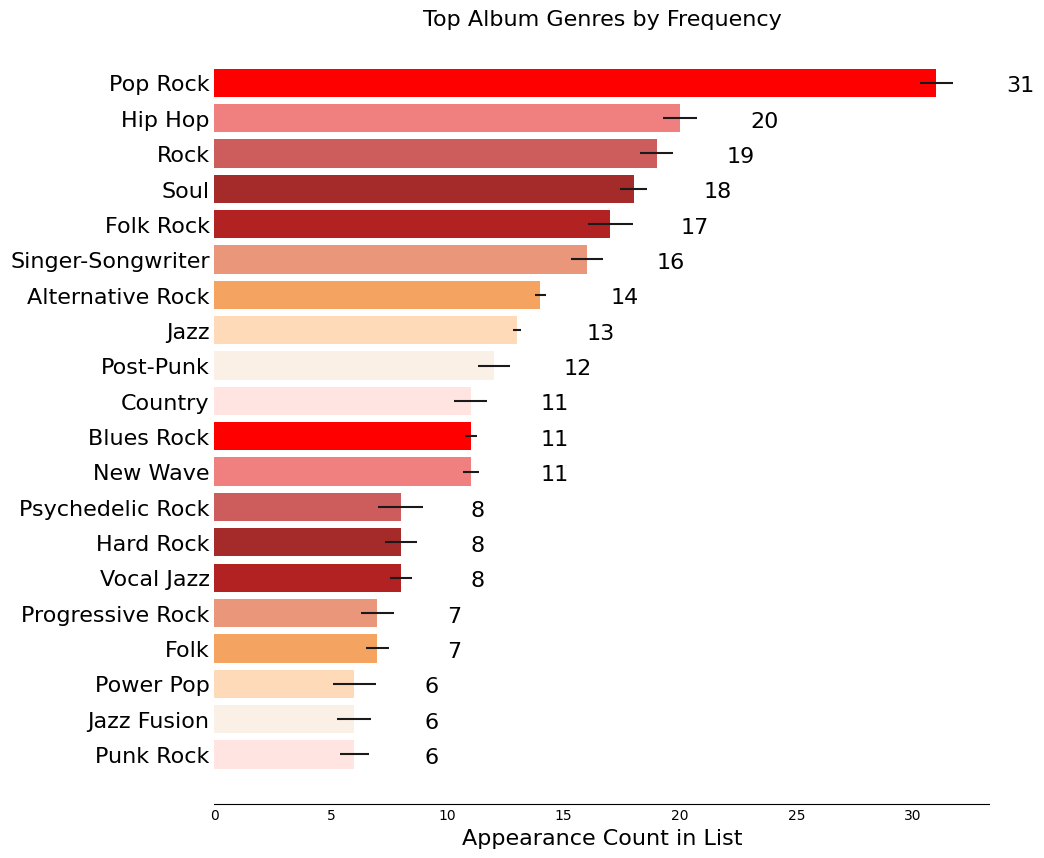

In [950]:
#creation of horizontal barplot

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots(figsize=(10,10))


#sets position of all ticks on the y axis
y_pos = np.arange(len(names_10))
# performance = 3 + 10 * np.random.rand(len(names_10))
error = np.random.rand(len(names_10))

ax.barh(y_pos, values_10, xerr=error, align='center', color=['red', 'lightcoral', 'indianred', 'brown', 
                                                             'firebrick', 'darksalmon', 'sandybrown',
                                                            'peachpuff', 'linen', 'mistyrose'])

# manages the ticks and labels
ax.set_yticks(y_pos)
ax.set_yticklabels(names_10, fontsize=16)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Appearance Count in List', fontsize=16)
ax.set_title('Top Album Genres by Frequency', fontsize=16)

# show values next to bar
for i, v in enumerate(values_10):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='medium', fontsize=16)

# remove spines from axis borders
ax.spines['right'].set_visible(False)    
ax.spines['left'].set_visible(False)    
ax.spines['top'].set_visible(False)    

# hide ticks from y-axis
ax.tick_params(length=0)
plt.show()

<h3> Answering the question:

    2. Most occurring decade in dataset - Which was the "BEST" decade for music according to this data?
    

<h3>Result:</h3>


    From the visual analysis below we can see that most loved decade in our dataset is 1970 followed by 1990. 

    1950 - 12 Albums
    
    1960 - 83 Albums
    
    1970 - 154 Albums
    
    1980 - 70 Albums
    
    1990 - 121 Albums
    
    2000 - 27 Albums
    
    2010 - 22 Albums



Text(0.5, 0, 'Decade')

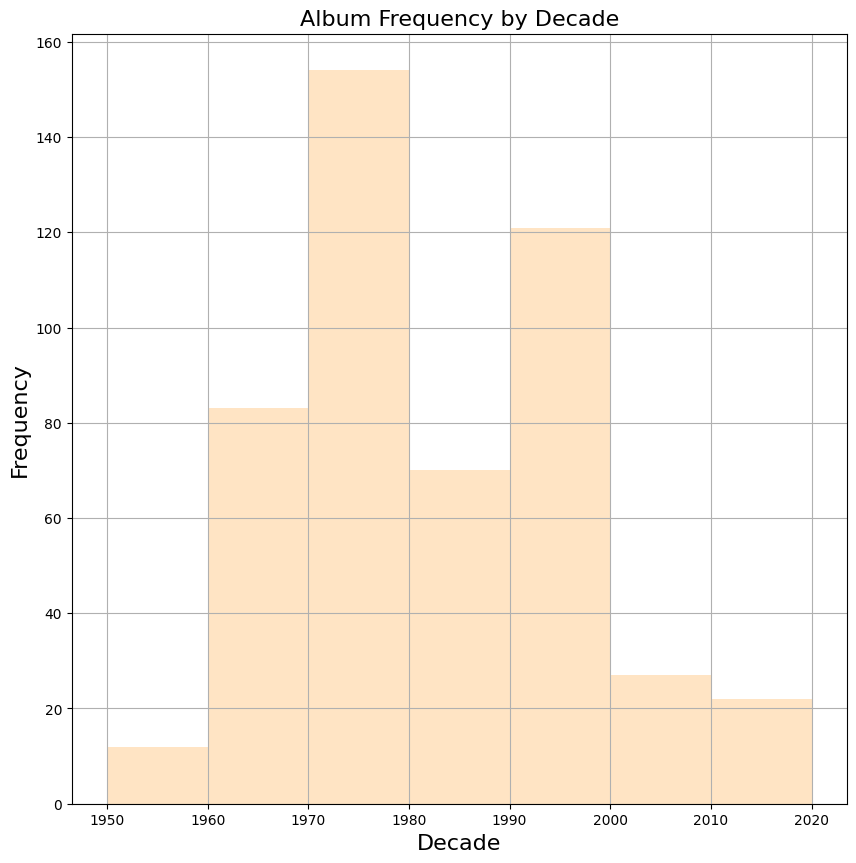

In [951]:
# creates a histogram by only using rows where a date value was present
years_sorted = ad2['date'].dt.year.sort_values(ascending=False).dropna()
# histogram object
years_sorted= years_sorted.plot(kind='hist',bins=[1950, 1960, 1970, 1980, 1990, 2000, 2010,2020], grid=True,
                                rwidth=1, color=['bisque'],
                                figsize=(10,10))

plt.title('Album Frequency by Decade', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xlabel('Decade', fontsize=16)


In [952]:
# creates frequency table based off numpy.histogram's (mimicking above hist) bins and values
count, divs = np.histogram(ad2['date'].dt.year.dropna(), bins=[1950, 1960, 1970, 1980, 1990,2000,
                                                               2010, 2020])
deca_df = pd.DataFrame([divs, count]).T
deca_df.rename(columns={0:'decade', 1:'frequency'}, inplace=True)
deca_df

,decade,frequency
0,1950.0,12.0
1,1960.0,83.0
2,1970.0,154.0
3,1980.0,70.0
4,1990.0,121.0
5,2000.0,27.0
6,2010.0,22.0
7,2020.0,NaN


<h3>Answering the question:</h3>

    3. Patterns in between Genre and Dates - what genres were most prevalent in each year?

<h3>Result:</h3>

    2000s - Ambient & Folk Metal

    2010s - Americana & Vocal Jazz
    
    1950s - Vocal Jazz
    
    1960s - Pop Rock
    
    1970s - Pop Rock 
    
    1980s - Alternative Rock
    
    1990s - Hip Hop


In [1003]:
# sorts the main dataframe for those not unknown or other
processed = ad2[(ad2['genre']!='Unknown') & (ad2['genre']!='Other')]
# creates a just year column to clearly see the year associated with each genre
processed['j_year']= processed['date'].dt.year
# groups by both columns we are interested in seeing and provides the appropriate columns
grouped_object['count'] = processed.groupby(['j_year','genre']).count().sort_values('rank', ascending=False)['rank']
# makes columns from the individual index objects found in the grouped object
for_plot = pd.DataFrame(grouped_object['count'].sort_index()).reset_index()


/Users/oldvasegreenbird/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [1054]:
# creates frequency table based off numpy.histogram's (mimicking above hist) bins and values


,j_year,genre,count
0,1955.0,Vocal Jazz,1
1,1956.0,Rock & Roll,2
2,1956.0,Vocal Jazz,1
3,1957.0,Jazz,2
4,1957.0,Vocal Jazz,1
...,...,...,...
281,2018.0,Americana,1
282,2019.0,Americana,1
283,2019.0,Death Metal,1
284,2019.0,Progressive Metal,1


In [1240]:
# labels for grouping by the decade
def prog_decades(x):
    if x >=1950 and x <1960:
        return '50s'
    elif x >=1960 and x <1970:
        return '60s'
    elif x >=1970 and x <1980:
        return '70s'
    elif x >=1980 and x <1990:
        return '80s'
    elif x >=1990 and x <2000:
        return '90s'
    elif x >=2000 and x <2010:
        return '00s'
    elif x >=2010 and x <2020:
        return '10s'
        
for_plot['decade'] = for_plot['j_year'].apply(lambda x: prog_decades(x))



['70s', '90s', '80s', '60s', '10s', '00s', '50s']

In [1367]:
# grouping the first time 
first = for_plot.groupby(['decade','genre'], as_index=False).count().sort_values(['decade','count'],
                                                                         ascending=[True, False])
# grouping the second time to pull the sorted leaders by indexing
first.groupby(['decade','genre','count'], 
              as_index=False).max().sort_values(['decade','count'],
                                                ascending=[True, False]).drop('j_year', axis=1)[:50]

,decade,genre,count
0,00s,Ambient,2
1,00s,Folk Metal,2
2,00s,IDM,1
3,00s,Indie Rock,1
4,00s,Post-Hardcore,1
5,00s,Progressive Metal,1
6,00s,Punk Rock,1
7,00s,Rock,1
9,10s,Americana,2
16,10s,Vocal Jazz,2


<h3>Answering the question:</h3>

    4. Most loved artists - Which artists appeared on this list the most?

<h3>Result:</h3>
The top artists, judged by number of albums in top 500 are as follows.

    The Beatles                          9

    The Rolling Stones                   7
    
    Elvis Presley                        6
    
    Brian Eno                            5

    Elvis Costello & The Attractions     5

    Frank Sinatra                        5

    Bob Dylan                            5

    Miles Davis                          5

    Bruce Springsteen                    4

    Neil Young                           4

In [1372]:
ad2['artist_name'].value_counts().sort_values(ascending=False)[:10]

The Beatles                          9
The Rolling Stones                   7
Elvis Presley                        6
Brian Eno                            5
Elvis Costello & The Attractions     5
Frank Sinatra                        5
Bob Dylan                            5
Miles Davis                          5
Bruce Springsteen                    4
Neil Young                           4
Name: artist_name, dtype: int64